# Support Vector Machine

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [38]:
data = pd.read_csv("Data\Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Preprocessing

In [40]:
x = data.iloc[:, 2:4].values
y = data.iloc[:, 4].values

### Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [42]:
x_scaled = scaler.fit_transform(x)

### Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

## Creating SVM

In [44]:
from sklearn.svm import SVC

classifier = SVC(kernel="linear")

In [45]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [46]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

### Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[57,  1],
       [ 6, 16]], dtype=int64)

In [73]:
print(f"Accuracy for Training (LINEAR) {classifier.score(x_train, y_train)}")
print(f"Accuracy for Test (LINEAR) {classifier.score(x_test, y_test)}")

Accuracy for Training (LINEAR) 0.821875
Accuracy for Test (LINEAR) 0.9125


We can see "Linear" kernel is ok but can be better.

### Visualizing

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


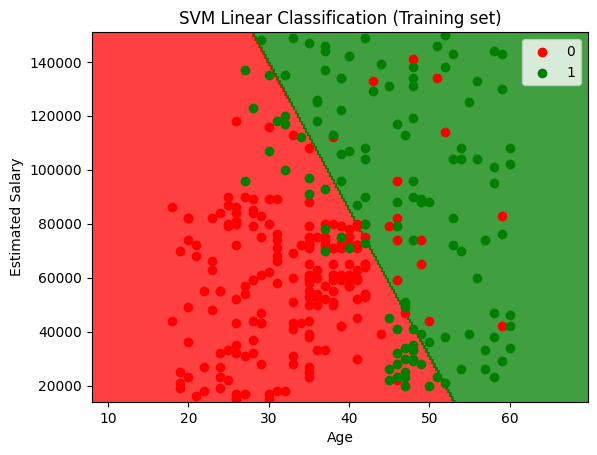

In [95]:
from matplotlib.colors import ListedColormap

X_set, y_set = scaler.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25))
plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM Linear Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## RBF Kernel

In [ ]:
rbf_classifier = SVC(kernel="rbf", gamma=0.4)  # found gamma value by an iterative approach (Refer Below)
rbf_classifier.fit(x_train, y_train)

In [50]:
y_pred_rbf = rbf_classifier.predict(x_test)
y_pred_rbf

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

### Confusion Matrix

In [51]:
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
cm_rbf

array([[55,  3],
       [ 1, 21]], dtype=int64)

It is much better than LINEAR

### Best Gamma Value

In [53]:
gammas = np.arange(0, 1, 0.01)
scores = []

In [54]:
for i in gammas:
    temp_svm = SVC(kernel="rbf", gamma=i)
    temp_svm.fit(x_train, y_train)
    scores.append(temp_svm.score(x_test, y_test))

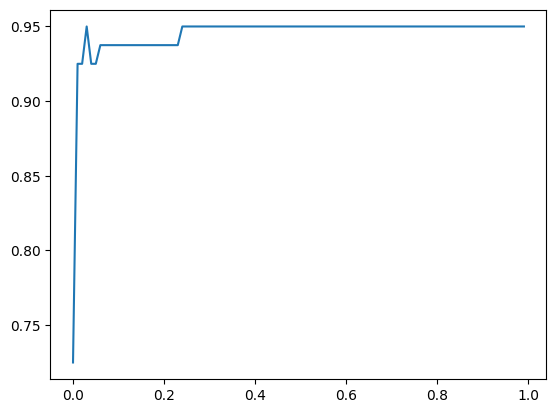

In [55]:
plt.plot(gammas, scores)

Gamma can be anything above 0.4

In [74]:
print(f"Accuracy for Training (RBF) {rbf_classifier.score(x_train, y_train)}")
print(f"Accuracy for Test Dataset (RBF) {rbf_classifier.score(x_test, y_test)}")

Accuracy for Training (RBF) 0.9
Accuracy for Test Dataset (RBF) 0.95


### Visualizing

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


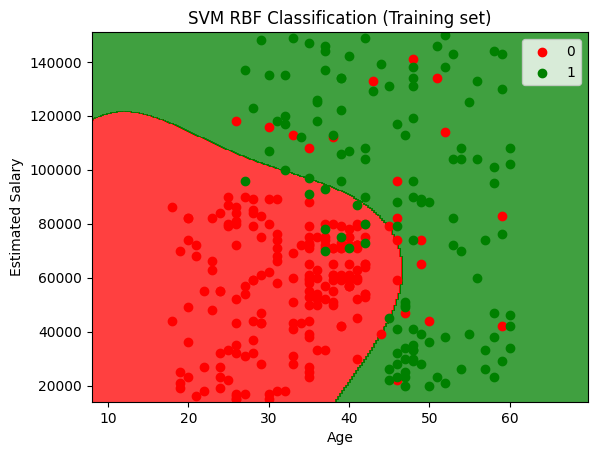

In [96]:
from matplotlib.colors import ListedColormap

X_set, y_set = scaler.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25))
plt.contourf(X1, X2, rbf_classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM RBF Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Polynomial Kernel

In [90]:
poly_classifier = SVC(kernel="poly", degree=1)

In [91]:
poly_classifier.fit(x_train, y_train)

SVC(degree=1, kernel='poly')

In [92]:
y_pred_poly = poly_classifier.predict(x_test)
y_pred_poly

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

### Best Degree Value

In [88]:
scores_poly = []
values = range(0, 10)
for i in values:
    temp_poly = SVC(kernel="poly", degree=i)
    temp_poly.fit(x_train, y_train)
    scores_poly.append(temp_poly.score(x_test, y_test))

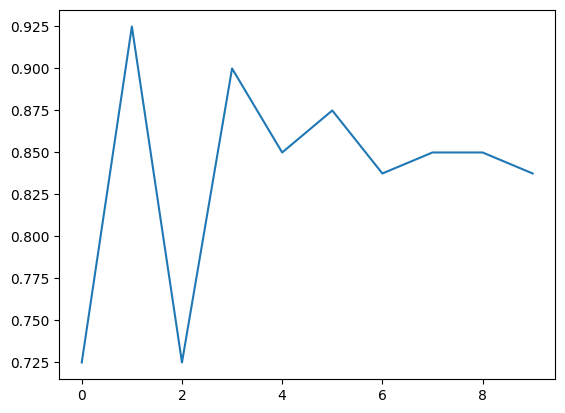

In [89]:
plt.plot(values, scores_poly)

Best degree = 1

### Confusion Matrix

In [59]:
cm_poly = confusion_matrix(y_test, y_pred_poly)
cm_poly

array([[57,  1],
       [ 7, 15]], dtype=int64)

In [75]:
print(f"Accuracy for Training (POLY) {poly_classifier.score(x_train, y_train)}")
print(f"Accuracy for Test Dataset (POLY) {poly_classifier.score(x_test, y_test)}")

Accuracy for Training (POLY) 0.83125
Accuracy for Test Dataset (POLY) 0.9


It is almost the same as LINEAR

## Sigmoid Kernel

In [61]:
sig_classifier = SVC(kernel="sigmoid")

In [62]:
sig_classifier.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [63]:
y_pred_sig = sig_classifier.predict(x_test)
y_pred_sig

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

### Confusion Matrix

In [64]:
cm_sig = confusion_matrix(y_test, y_pred_sig)
cm_sig

array([[50,  8],
       [10, 12]], dtype=int64)

In [77]:
print(f"Accuracy for Training (SIGMOID) {sig_classifier.score(x_train, y_train)}")
print(f"Accuracy for Test Dataset (SIGMOID) {sig_classifier.score(x_test, y_test)}")

Accuracy for Training (SIGMOID) 0.646875
Accuracy for Test Dataset (SIGMOID) 0.775


It doesn't suit our dataset

## Conclusion

In [93]:
summary = pd.DataFrame(index={"Linear", "Polynomial", "RBF", "Sigmoid"})
summary["Train data"] = np.array([classifier.score(x_train, y_train), rbf_classifier.score(x_train, y_train),
                                  poly_classifier.score(x_train, y_train), sig_classifier.score(x_train, y_train)])
summary["Test data"] = np.array([classifier.score(x_test, y_test), rbf_classifier.score(x_test, y_test),
                                 poly_classifier.score(x_test, y_test), sig_classifier.score(x_test, y_test)])
summary.sort_values(by=["Test data"], ascending=False)

,Train data,Test data
RBF,0.900000,0.9500
Polynomial,0.825000,0.9250
Linear,0.821875,0.9125
Sigmoid,0.646875,0.7750


RBF is the best kernel for our dataset